In [5]:
import pandas as pd 
from os.path import join
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr
from scipy.ndimage import gaussian_filter1d
import numpy as np
%matplotlib inline

In [6]:
data_dir = join('.','..', 'FastData')
files = !ls $data_dir
files = [f for f in files if f.endswith('.csv')]
ids = list(set([x[:3] for x in files]))
# files = random.sample(files, 2)

In [7]:
ids = list(set([x[:3] for x in files]))

# Raw data vs Random Data

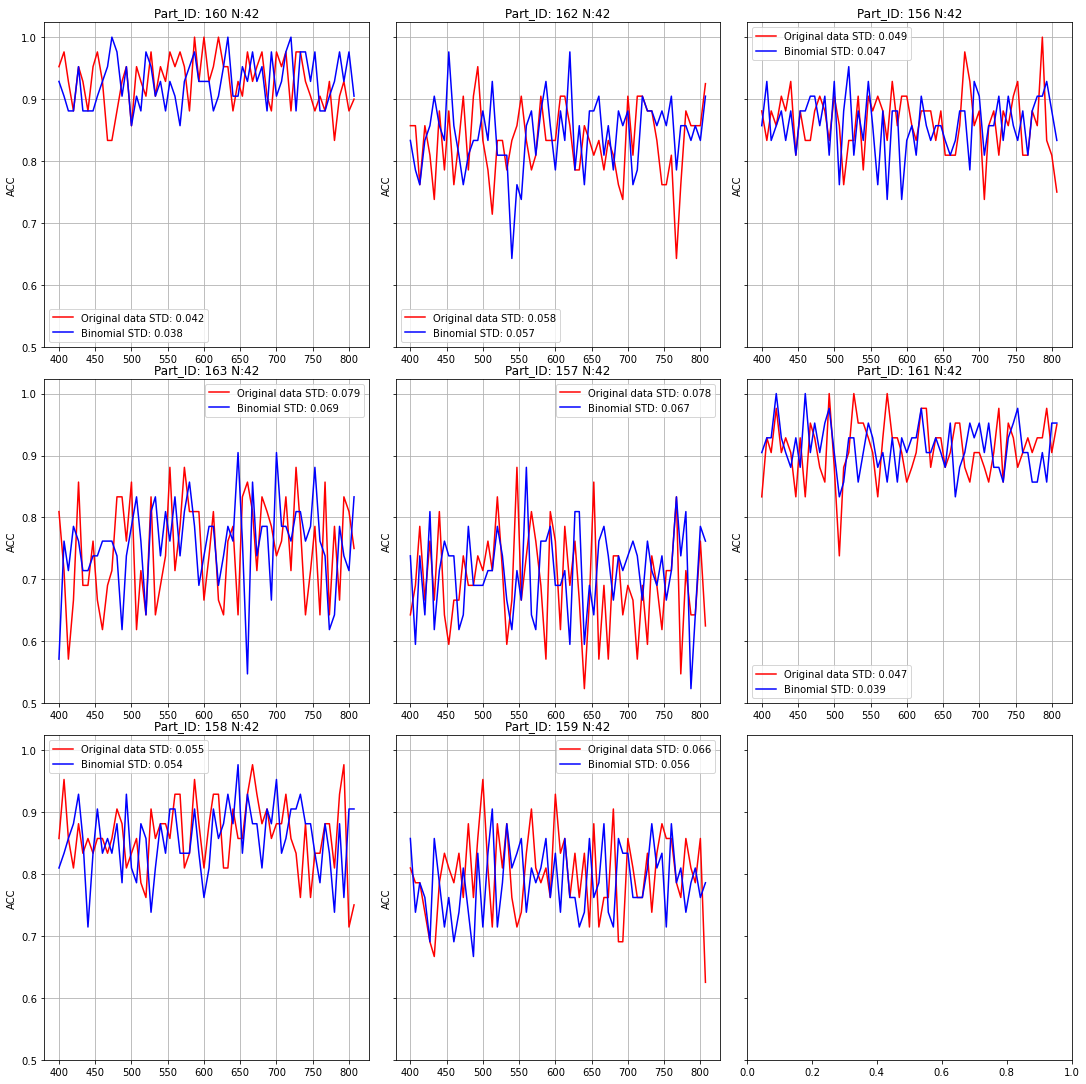

In [11]:
fig, axs = plt.subplots(1+len(ids)//3, 3, figsize=(15, 15), sharey=True)
axs = axs.flatten()
fig.tight_layout()
for idx, id in enumerate(ids):
    fs = [x for x in files if x.startswith(id)]
    data = pd.concat([pd.read_csv(join(data_dir, fs[0])),pd.read_csv(join(data_dir, fs[1]))])
    # original_data = data.query("Trial_type != 'training'").groupby("CSI").mean().Corr.to_numpy()
    original_data = data.query("Trial_type != 'training'")
    acc = original_data.groupby("CSI").mean().Corr.to_numpy()
    # nDropped = np.sum(original_data.nDropped > 0)
    # nD = original_data.groupby("CSI").sum().nDropped.to_numpy()/60.0
    p = np.mean(acc)
    n = original_data.groupby("CSI").count().Corr[105] 
    emulated = np.random.binomial(n, p, 62) / np.float(n)
    # print(emulated)
    t = np.round((np.arange(62) * 8.666666666) + 400)
    # axs[idx].plot( nD, c='b')
    axs[idx].plot(t, acc, label=f'Original data STD: {np.std(acc):.2}', color='r')
    axs[idx].plot(t, emulated, label=f'Binomial STD: {np.std(emulated):.2}', color='b')
    axs[idx].set_title(f"Part_ID: {id} N:{n}" )
    axs[idx].set_ylabel("ACC")
    # axs[idx].set_xlim([200,1000])
    # axs[idx].set_ylim([-0.3,0.3])
    axs[idx].legend()
    axs[idx].grid()

# fig.savefig("Sacc_normalised.png")
# fix.legend()
fig.show()